--- Using TensorFlow Version: 2.20.0 ---
Found 1509 files belonging to 5 classes.
Found 324 files belonging to 5 classes.
Found 326 files belonging to 5 classes.

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         2,885 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 942,005 (3.59 MB)

 Trainable params: 2,885 (11.27 KB)

 Non-trainable params: 939,120 (3.58 MB)

Epoch 1/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 44s 536ms/step - accuracy: 0.2074 - loss: 1.7095 - val_accuracy: 0.2716 - val_loss: 1.5963
Epoch 2/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 30s 318ms/step - accuracy: 0.2187 - loss: 1.6673 - val_accuracy: 0.2716 - val_loss: 1.5680
Epoch 3/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.2326 - loss: 1.6371 - val_accuracy: 0.2716 - val_loss: 1.5587
Epoch 4/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 335ms/step - accuracy: 0.2379 - loss: 1.6481 - val_accuracy: 0.2716 - val_loss: 1.5551
Epoch 5/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 342ms/step - accuracy: 0.2346 - loss: 1.6451 - val_accuracy: 0.2716 - val_loss: 1.5537
Epoch 6/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 306ms/step - accuracy: 0.2432 - loss: 1.6183 - val_accuracy: 0.2747 - val_loss: 1.5529
Epoch 7/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 314ms/step - accuracy: 0.2465 - loss: 1.6176 - val_accuracy: 0.2870 - val_loss: 1.5524
Epoch 8/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 305ms/step - accuracy: 0.2584 - loss: 1.6089 - val_accu

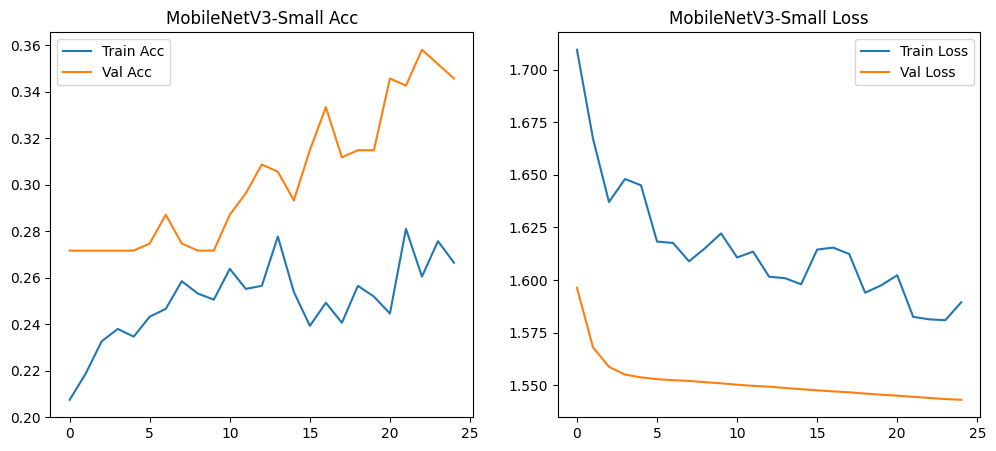

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 696ms/step


c:\Users\TAMANG\Documents\GitHub\Papaya-Leaf-Disease\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\TAMANG\Documents\GitHub\Papaya-Leaf-Disease\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\TAMANG\Documents\GitHub\Papaya-Leaf-Disease\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war


--- MobileNetV3-Small Classification Report ---
                precision    recall  f1-score   support

  Anthracnose       0.00      0.00      0.00        54
BacterialSpot       0.00      0.00      0.00        69
         Curl       0.30      0.95      0.45        88
      Healthy       0.00      0.00      0.00        35
     RingSpot       0.60      0.33      0.42        80

     accuracy                           0.34       326
    macro avg       0.18      0.26      0.18       326
 weighted avg       0.23      0.34      0.23       326



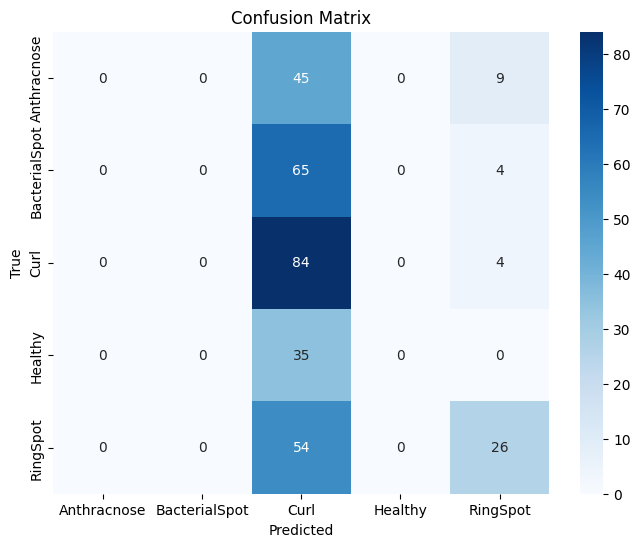

In [1]:
# ==============================================================================
# STANDALONE SCRIPT FOR PAPAYA LEAF DISEASE CLASSIFICATION (MobileNetV3-Small)
# This version includes the critical model.save() step.
# ==============================================================================

import os
import shutil
import random
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print(f"--- Using TensorFlow Version: {tf.__version__} ---")

# --- 1. SETUP AND CONSTANTS ---
SEED = 42
tf.keras.utils.set_random_seed(SEED)
ORIGINAL_DATA_DIR = pathlib.Path('BDPapayaLeaf/Original Images')
SPLIT_BASE_DIR = pathlib.Path('papaya_data_split_mobilenet')
CLASS_NAMES = sorted([item.name for item in ORIGINAL_DATA_DIR.glob('*') if item.is_dir()])
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 25
LEARNING_RATE = 0.0001
NUM_CLASSES = len(CLASS_NAMES)

# --- 2. DATA PREPARATION ---
if SPLIT_BASE_DIR.exists(): shutil.rmtree(SPLIT_BASE_DIR)
train_dir, val_dir, test_dir = (SPLIT_BASE_DIR / d for d in ['train', 'validation', 'test'])
for d in [train_dir, val_dir, test_dir]: os.makedirs(d)
for cn in CLASS_NAMES:
    for d in [train_dir, val_dir, test_dir]: os.makedirs(d / cn)
    image_files = list((ORIGINAL_DATA_DIR / cn).glob('*.jpg'))
    random.Random(SEED).shuffle(image_files)
    t, v = int(len(image_files) * 0.7), int(len(image_files) * 0.85)
    for i, f in enumerate(image_files):
        if i < t: shutil.copy(f, train_dir / cn)
        elif i < v: shutil.copy(f, val_dir / cn)
        else: shutil.copy(f, test_dir / cn)

# --- 3. DATA PIPELINES ---
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical', shuffle=True, seed=SEED)
val_ds = tf.keras.utils.image_dataset_from_directory(val_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical', shuffle=False)
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical', shuffle=False)
AUTOTUNE = tf.data.AUTOTUNE
train_ds, val_ds, test_ds = (ds.cache().prefetch(AUTOTUNE) for ds in [train_ds, val_ds, test_ds])

# --- 4. HELPER FUNCTIONS ---
def plot_history(h, name):
    acc, val_acc, loss, val_loss = h.history['accuracy'], h.history['val_accuracy'], h.history['loss'], h.history['val_loss']
    plt.figure(figsize=(12, 5)); plt.subplot(1, 2, 1); plt.plot(acc, label='Train Acc'); plt.plot(val_acc, label='Val Acc'); plt.legend(); plt.title(f'{name} Acc')
    plt.subplot(1, 2, 2); plt.plot(loss, label='Train Loss'); plt.plot(val_loss, label='Val Loss'); plt.legend(); plt.title(f'{name} Loss'); plt.show()

def plot_cm(true, pred, classes):
    cm = confusion_matrix(true, pred); plt.figure(figsize=(8, 6)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix'); plt.show()

# --- 5. MODEL BUILDING (MobileNetV3-Small) ---
tf.keras.backend.clear_session()
base_model = tf.keras.applications.MobileNetV3Small(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,))
base_model.trainable = False
model_mobilenet = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=IMG_SIZE + (3,)),
    tf.keras.layers.Rescaling(1./255.),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model_mobilenet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])
model_mobilenet.summary()

# --- 6. MODEL TRAINING ---
history_mobilenet = model_mobilenet.fit(train_ds, epochs=EPOCHS, validation_data=val_ds, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

# --- 6.1. SAVE THE TRAINED MODEL ---
print("\n--- Saving MobileNetV3-Small model ---")
model_mobilenet.save("papaya_disease_mobilenetv3.keras")
print("Model saved to papaya_disease_mobilenetv3.keras")

# --- 7. MODEL EVALUATION ---
plot_history(history_mobilenet, "MobileNetV3-Small")
y_pred = np.argmax(model_mobilenet.predict(test_ds), axis=1)
y_true = np.argmax(np.concatenate([y for x, y in test_ds]), axis=1)
print("\n--- MobileNetV3-Small Classification Report ---\n", classification_report(y_true, y_pred, target_names=CLASS_NAMES))
plot_cm(y_true, y_pred, CLASS_NAMES)